In [1]:
#import findspark
#findspark.init()
import pyspark

from pyspark.sql import SparkSession
from pyspark.sql import Row
import pyspark.sql.functions as func
import matplotlib.pyplot as plt


spark = SparkSession.builder \
    .master("local[2]") \
    .appName("COM6012 Assignment 1 Task1") \
    .getOrCreate()

sc = spark.sparkContext


In [2]:
logFile=spark.read.text("NASA_access_log_Jul95.gz").cache()

In [3]:
logFile.count()

1891715

In [4]:
reqs = logFile.withColumn('time', func.regexp_extract(logFile['value'],':(.*) -',1))

In [5]:
reqs_with_data = reqs.withColumn('Date', func.regexp_extract(func.col('value'),'\[(\d+)\/Jul',1))

In [6]:
df_first_slot = reqs_with_data.filter(func.col("time").between("00:00:00","03:59:59"))

In [7]:
avg_1=df_first_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [8]:
df_second_slot = reqs_with_data.filter(func.col("time").between("04:00:00","07:59:59"))

In [9]:
avg_2=df_second_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [10]:
df_third_slot = reqs_with_data.filter(func.col("time").between("08:00:00","11:59:59"))

In [11]:
avg_3=df_third_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [12]:
df_fourth_slot = reqs_with_data.filter(func.col("time").between("12:00:00","15:59:59"))

In [13]:
avg_4=df_fourth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [14]:
df_fifth_slot = reqs_with_data.filter(func.col("time").between("16:00:00","19:59:59"))

In [15]:
avg_5=df_fifth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [16]:
df_sixth_slot = reqs_with_data.filter(func.col("time").between("20:00:00","23:59:59"))

In [17]:
avg_6=df_fifth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [47]:
rdd_report = sc.parallelize([('0 -- 4',avg_1),
                             ('4 -- 8',avg_2),
                             ('8 -- 12',avg_3),
                             ('12 -- 16',avg_4),
                             ('16 -- 20',avg_5),
                             ('20 -- 24',avg_6)])
df_report = rdd_report.toDF(["Six different Timeslot","Average number of request of Jul"])

In [48]:
df_report.show()

+----------------------+--------------------------------+
|Six different Timeslot|Average number of request of Jul|
+----------------------+--------------------------------+
|                0 -- 4|             [7079.714285714285]|
|                4 -- 8|             [5479.392857142857]|
|               8 -- 12|             [14462.32142857143]|
|              12 -- 16|            [17377.571428571428]|
|              16 -- 20|            [13580.333333333334]|
|              20 -- 24|            [13580.333333333334]|
+----------------------+--------------------------------+



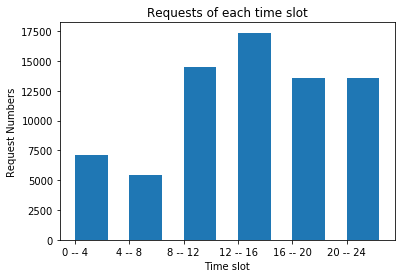

In [118]:
import numpy as np
df_pd = df_report.toPandas()


plt.bar(df_pd['Six different Timeslot'],df_pd['Average number of request of Jul'],align='edge',width =0.6)
plt.title("Requests of each time slot")
plt.xlabel("Time slot")
plt.ylabel("Request Numbers")
plt.savefig('Q1A_FIG1')
plt.show()

In [54]:
reqs_file = logFile.withColumn('File_name', func.regexp_extract(logFile['value'],'\"GET (.*)HTTP',1))

In [55]:
df_new = reqs_file.filter(reqs_file['File_name'].contains(".html"))

In [56]:
reqs_df_count=df_new.groupBy('File_name').count().sort('count', ascending=False)

In [60]:
reqs_df_count = reqs_df_count.limit(20)

In [62]:
reqs_df_count.show()

+--------------------+-----+
|           File_name|count|
+--------------------+-----+
|          /ksc.html |39854|
|/shuttle/missions...|24745|
|/shuttle/countdow...|21946|
|/shuttle/missions...|16619|
|/shuttle/missions...|16056|
|/shuttle/missions...|15861|
|/history/apollo/a...|14437|
|/history/apollo/a...|13742|
|/history/history....|11675|
|/shuttle/countdow...| 8548|
|/shuttle/technolo...| 7363|
|/shuttle/missions...| 6926|
|/software/winvn/w...| 6768|
|/shuttle/missions...| 6702|
|/shuttle/missions...| 6299|
|/shuttle/missions...| 6095|
|/history/apollo/a...| 5734|
|/facilities/lc39a...| 5254|
|/history/apollo/a...| 4963|
|/shuttle/countdow...| 4205|
+--------------------+-----+



In [82]:
df_reqs= reqs_df_count.toPandas()

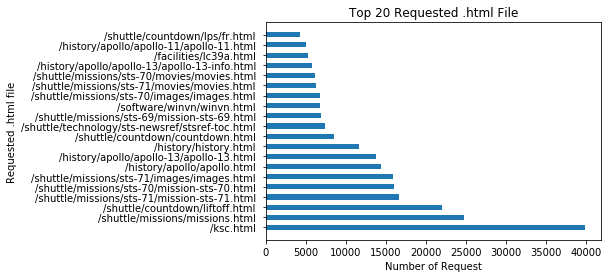

In [114]:

plt.barh(df_reqs['File_name'],height =0.5,width = df_reqs['count'])
plt.title("Top 20 Requested .html File")
plt.xlabel("Number of Request")
plt.ylabel("Requested .html file")
plt.show()